# Proyek Analisis Data: E-Commerce Public
- **Nama:** Michael Albert Yulianto
- **Email:** m239b4ky2478@bangkit.academy
- **ID Dicoding:** Michael Albert Yulianto

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak terjual?
- Seberapa tinggi tingkat kinerja pengiriman?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# untuk menampilkan seluruh data tanpa limit
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
payment_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_order_payments_dataset.csv")
print(payment_df.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [7]:
category_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/product_category_name_translation.csv")
print(category_df.head())

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


In [8]:
product_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_products_dataset.csv")
print(product_df.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [9]:
order_item_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_order_items_dataset.csv")
print(order_item_df.head())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [10]:
customers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_customers_dataset.csv")
print(customers_df.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [11]:
order_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/olist_orders_dataset.csv")
print(order_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

**Insight:**

- Untuk mengetahui kategori produk yang paling banyak terjual, dapat menganalisis `product_category_name` dalam `order_item_df` dan menghitung jumlah item terjual per kategori. Kategori dengan jumlah terbanyak akan menunjukkan produk yang paling diminati oleh pelanggan.
- Kinerja pengiriman dapat diukur dengan membandingkan tanggal pesanan dengan tanggal pengiriman. dapat menghitung selisih antara `order_approved_at` dan `order_delivered_customer_date` untuk mendapatkan waktu pengiriman aktual. Rata-rata waktu pengiriman akan memberikan gambaran tentang seberapa cepat produk sampai ke pelanggan.
- Selain itu, dapat menghitung persentase pesanan yang berhasil dikirim sesuai dengan estimasi waktu pengiriman (`order_estimated_delivery_date`).

### Assessing Data

**Mencari Informasi dari dataset**

In [12]:
print(payment_df.info())
print('\n')
print(category_df.info())
print('\n')
print(product_df.info())
print('\n')
print(order_item_df.info())
print('\n')
print(customers_df.info())
print('\n')
print(order_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32

**Mengidentifikasi data yang kosong(nan)**

In [13]:
print(payment_df.isna().sum())
print('\n')
print(category_df.isna().sum())
print('\n')
print(product_df.isna().sum())
print('\n')
print(order_item_df.isna().sum())
print('\n')
print(customers_df.isna().sum())
print('\n')
print(order_df.isna().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


product_category_name            0
product_category_name_english    0
dtype: int64


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


order_id                            0
customer_id                         0
order_status      

**Mencari data duplikat**

In [14]:
print("Payment :",payment_df.duplicated().sum())
print('\n')
print("Category :",category_df.duplicated().sum())
print('\n')
print("Product :",product_df.duplicated().sum())
print('\n')
print("Order :",order_item_df.duplicated().sum())
print('\n')
print("Customers :",customers_df.duplicated().sum())
print('\n')
print("Order :",order_df.duplicated().sum())

Payment : 0


Category : 0


Product : 0


Order : 0


Customers : 0


Order : 0


In [15]:
print(payment_df.describe())
print('\n')
print(category_df.describe())
print('\n')
print(product_df.describe())
print('\n')
print(order_item_df.describe())
print('\n')
print(customers_df.describe())
print('\n')
print(order_df.describe())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000  

In [16]:
print(payment_df.dtypes)
print("\n")
print(category_df.dtypes)
print("\n")
print(product_df.dtypes)
print("\n")
print(order_item_df.dtypes)
print("\n")
print(customers_df.dtypes)
print("\n")
print(order_df.dtypes)

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


product_category_name            object
product_category_name_english    object
dtype: object


product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               obje

**Insight:**
- Sebagian besar dataset relatif bersih, namun beberapa kolom penting pada data produk dan pesanan memiliki missing value yang perlu diperhatikan.
- 160 missing values di tabel order kolom `order_approved_at`.
- 1.783 missing values di tabel order kolom `order_delivered_carrier_date`.
- 2.965 missing values di tabel order kolom `order_delivered_customer_date`.
- Missing values di kolom terkait tanggal pengiriman dan penerimaan pelanggan dapat menunjukkan pesanan yang belum diproses atau masalah dalam pengiriman. Hal ini perlu diperhatikan karena dapat berdampak pada kepuasan pelanggan dan kinerja pengiriman.
- Semua dataset bersih dari nilai duplikat. Ini merupakan tanda bahwa kualitas data cukup baik dan siap digunakan untuk berbagai analisis lebih lanjut tanpa memerlukan pembersihan tambahan terkait duplikasi.

### Cleaning Data

**Menghapus data yang tidak lengkap**

In [17]:
print(payment_df['payment_type'].unique())

payment_df.loc[payment_df['payment_type'] == 'not_defined', 'payment_type'] = 'unknown'

print(payment_df['payment_type'].unique())


['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
['credit_card' 'boleto' 'voucher' 'debit_card' 'unknown']


**Insight:**
- Kolom payment_type awalnya mengandung nilai `not_defined`, yang menunjukkan adanya metode pembayaran yang tidak teridentifikasi. Nilai ini dapat membingungkan dalam analisis dan mengganggu interpretasi hasil.
- Penggantian `not_defined` dengan `unknown` memberikan kejelasan lebih dalam laporan dan analisis data.

## Exploratory Data Analysis (EDA)

### Explore ...

**Gabungkan Data**

In [18]:
merged_df = pd.merge(order_item_df, product_df, on='product_id', how='left')

merged_df = pd.merge(merged_df, category_df, on='product_category_name', how='left')

merged_df = pd.merge(merged_df, payment_df, on='order_id', how='left')

merged_df = pd.merge(merged_df, order_df, on='order_id', how='left')

merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117604 non-null  object 
 1   order_item_id                  117604 non-null  int64  
 2   product_id                     117604 non-null  object 
 3   seller_id                      117604 non-null  object 
 4   shipping_limit_date            117604 non-null  object 
 5   price                          117604 non-null  float64
 6   freight_value                  117604 non-null  float64
 7   product_category_name          115906 non-null  object 
 8   product_name_lenght            115906 non-null  float64
 9   product_description_lenght     115906 non-null  float64
 10  product_photos_qty             115906 non-null  float64
 11  product_weight_g               117584 non-null  float64
 12  product_length_cm             

**Insight:**

1. Informasi Pesanan
- Setiap entri di DataFrame ini terhubung dengan satu pesanan unik melalui `order_id`.
- Dengan informasi di kolom `order_status`, bisa menganalisis tingkat kepuasan pelanggan berdasarkan status pengiriman. Hanya ada satu status yang terlihat, yaitu `delivered`, dan perlu memeriksa variasi status lainnya yang mungkin ada di dataset asli.
2. Informasi Pelanggan
- Kolom `customer_city` dan `customer_state` memberikan wawasan tentang lokasi pelanggan. Analisis lebih lanjut dapat dilakukan untuk memahami pola pembelian berdasarkan lokasi geografi.
- `customer_unique_id` memungkinkan untuk melakukan analisis lebih dalam tentang perilaku pelanggan dan frekuensi pembelian.
3. Informasi Produk
- Dengan kolom `product_category_name`, dapat menganalisis kategori mana yang paling banyak terjual. Ini akan membantu dalam perencanaan inventaris dan strategi pemasaran.
- Meskipun ada beberapa nilai null dalam kategori produk, kami masih memiliki cukup informasi untuk membuat analisis yang berarti.
4. Pembayaran
- Melalui kolom `payment_type`, dapat menganalisis metode pembayaran yang paling umum digunakan oleh pelanggan. Ini memberikan wawasan tentang preferensi pelanggan dalam hal metode pembayaran.
- Kolom `payment_value` menunjukkan nilai total yang dibayarkan oleh pelanggan, memberikan wawasan tentang pengeluaran rata-rata pelanggan per pesanan.
5. Kinerja Pengiriman
- Dengan menggunakan kolom `order_estimated_delivery_date`, `order_delivered_customer_date`, dan `order_delivered_carrier_date`, dapat menghitung rata-rata waktu pengiriman dan mengevaluasi seberapa baik kinerja pengiriman dibandingkan dengan estimasi yang diberikan.
- Waktu pengiriman yang cepat dan sesuai estimasi dapat berkontribusi pada kepuasan pelanggan, sehingga analisis ini penting untuk peningkatan layanan.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling banyak terjual?

**Mencari angka penjualan tiap kategori**

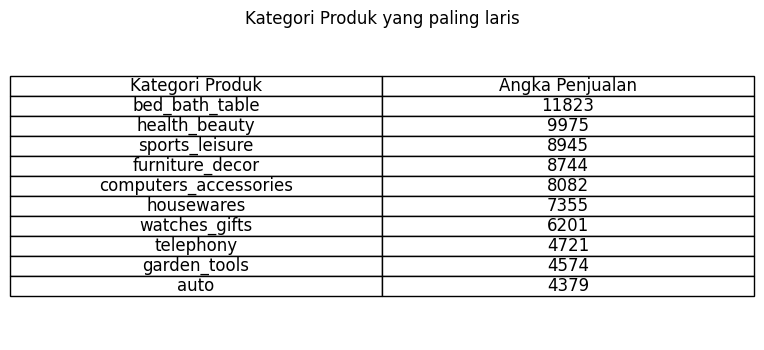

In [19]:
top_10_product_category = merged_df.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False).head(10)
top_10_product_category_df = top_10_product_category.reset_index()
top_10_product_category_df.columns = ['Kategori Produk', 'Angka Penjualan']

fig, ax = plt.subplots(figsize=(8, 4))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=top_10_product_category_df.values, colLabels=top_10_product_category_df.columns, cellLoc='center', loc='center')

table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('Kategori Produk yang paling laris')
plt.show()


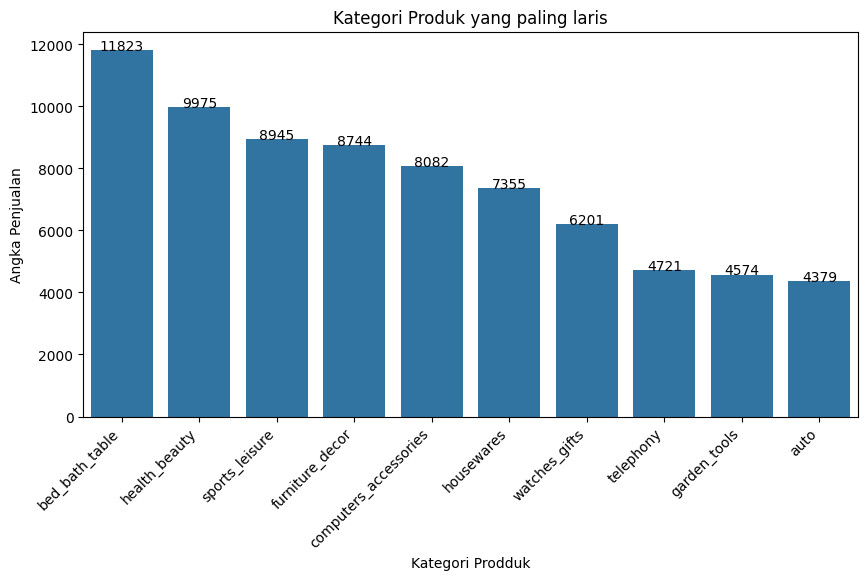

product_category_name_english
bed_bath_table           11823
health_beauty             9975
sports_leisure            8945
furniture_decor           8744
computers_accessories     8082
Name: order_id, dtype: int64


In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_product_category.index, y=top_10_product_category.values)

plt.title('Kategori Produk yang paling laris')
plt.xlabel('Kategori Prodduk')
plt.ylabel('Angka Penjualan')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(top_10_product_category.values):
    plt.text(i, value + 0.5, f'{value}', ha='center')

plt.show()

print(top_10_product_category.head())

### Pertanyaan 2: Seberapa tinggi tingkat kinerja pengiriman?

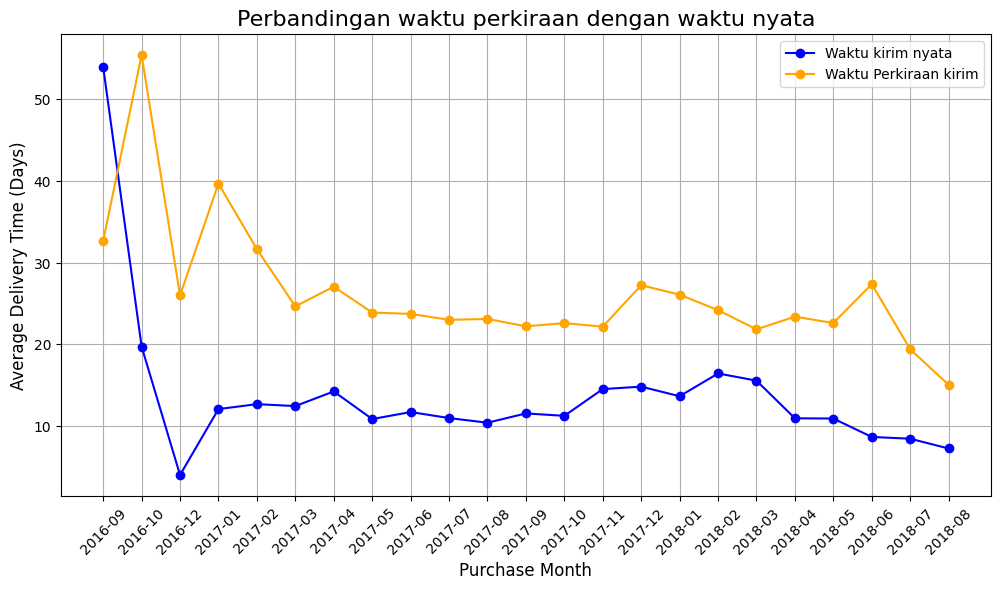

                actual_delivery_time  estimated_delivery_time
purchase_month                                               
2016-09                    54.000000                32.666667
2016-10                    19.738095                55.451444
2016-12                     4.000000                26.000000
2017-01                    12.073728                39.696517
2017-02                    12.677370                31.665858


In [23]:
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'], errors='coerce')
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'], errors='coerce')
merged_df['actual_delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days
merged_df['estimated_delivery_time'] = (merged_df['order_estimated_delivery_date'] - merged_df['order_purchase_timestamp']).dt.days
merged_df['purchase_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

delivery_trend = merged_df.groupby('purchase_month')[['actual_delivery_time', 'estimated_delivery_time']].mean().dropna()

plt.figure(figsize=(12, 6))
plt.plot(delivery_trend.index.astype(str), delivery_trend['actual_delivery_time'], label='Waktu kirim nyata', marker='o', color='blue')
plt.plot(delivery_trend.index.astype(str), delivery_trend['estimated_delivery_time'], label='Waktu Perkiraan kirim', marker='o', color='orange')
plt.title('Perbandingan waktu perkiraan dengan waktu nyata', fontsize=16)
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Average Delivery Time (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

print(delivery_trend.head())


**Insight:**
1. Pertanyaan pertama
  1. Kategori bed_bath_table adalah yang paling laris dengan penjualan 11,823 unit.
  2. Produk health_beauty dan sports_leisure juga populer dengan penjualan masing-masing 9,975 dan 8,945 unit.
  3. Kategori furniture_decor, computers_accessories, dan housewares memiliki penjualan di kisaran 8,000 unit.
  4. Kategori watches_gifts, telephony, garden_tools, dan auto berada di peringkat bawah, namun masih menunjukkan permintaan signifikan.


---


2. Pertanyaan kedua
  1.  Waktu pengiriman aktual (garis biru) mengalami penurunan signifikan dari 2016 hingga 2018. Pada bulan September 2016, waktu pengiriman aktual dimulai sekitar 52 hari, tetapi dengan cepat turun hingga di bawah 10 hari setelah Desember 2016, dan stabil pada kisaran 10-15 hari pada sebagian besar periode 2017-2018.
  2. Waktu pengiriman yang diperkirakan (garis kuning) lebih tinggi pada awal periode, khususnya antara September 2016 dan Desember 2016, di mana rata-rata diperkirakan sekitar 40 hingga 50 hari.
  3. Selama periode awal (2016), ada perbedaan besar antara waktu pengiriman aktual dan perkiraan, dengan perkiraan yang jauh lebih tinggi daripada aktual.

## Conclusion

# **Conclution pertanyaan 1**

- Produk rumah tangga (bed_bath_table) mendominasi pasar, diikuti oleh produk kesehatan dan kecantikan (health_beauty).
- Kategori teknologi seperti computers_accessories tetap populer, namun kalah dibandingkan produk rumah tangga.
- Ada peluang untuk meningkatkan penjualan di kategori garden_tools, auto, dan telephony dengan strategi yang dapat lebih menarik pelanggan.

Dilihat secara keseluruhan, kategori tertinggi dengan kategori paling rendah memiliki gap/perbedaan yang lumayan banyak sehingga dapat disimpulkan penjualan barang kurang merata.

---



# **Conclution pertanyaan 2**
- Peningkatan Kinerja Pengiriman: Pengiriman aktual mengalami peningkatan signifikan dalam hal kecepatan, menunjukkan bahwa efisiensi pengiriman meningkat secara bertahap dari waktu ke waktu.
- Penyesuaian Estimasi Waktu Pengiriman: Pada awalnya, perkiraan pengiriman terlalu tinggi dibandingkan dengan realitas. Namun, selama periode 2017 hingga 2018, estimasi menjadi lebih realistis meskipun masih cenderung lebih konservatif dibandingkan waktu aktual.
- Efisiensi Logistik yang Lebih Baik: Peningkatan ini bisa diartikan bahwa sistem logistik, penanganan pesanan, atau distribusi telah dioptimalkan dari tahun ke tahun, memungkinkan perusahaan untuk mengirimkan pesanan lebih cepat dibandingkan dengan prediksi mereka sendiri.

Secara keseluruhan, grafik ini menunjukkan tren positif dalam hal kecepatan dan ketepatan pengiriman yang dapat mempengaruhi kepuasan pelanggan di masa depan.
